# User Profiling and Segmentation using Python

User profilling refers to creating detailed profiles that represent the behaviours and preferences of users, and segmentation divides the user base into disticnt groups with common characteristics, making it easier to target specific segments with personalized marketing, products, or services.

User profiling and segmentation are powerful techniques that enable data professionals to understand their user base in-depth and tailor their strategies to meet diverse user needs. Below is the process we can follow for the task of User Profiling and Segmentation:

1. Determine what you aim to achieve with user profiling and segmentation, such as improving customer service, personalized marketing, or product recommendation.
2. Collect data from various sources, including user interactions on websites/apps, transaction histories, social media activity, and demographic information.
3. Create new features that capture relevant user behaviours and preferences. It may involve aggregating transaction data, calculating the frequency of activities, or extracting patterns from usage logs.
4. Select appropriate segmentation techniques.
5. For each segment identified, create user profiles that summarize the key characteristics and behaviours of users in that segment.

In [1]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("D:/Users/Documents/Private/Python Project/User Profiling and Segmentation/Data/user_profiles_for_ads.csv")
print(data.head())

   User ID    Age  Gender  Location Language Education Level  \
0        1  25-34  Female  Suburban    Hindi       Technical   
1        2    65+    Male     Urban    Hindi             PhD   
2        3  45-54  Female  Suburban  Spanish       Technical   
3        4  35-44  Female     Rural  Spanish             PhD   
4        5  25-34  Female     Urban  English       Technical   

   Likes and Reactions  Followed Accounts  Device Usage  \
0                 5640                190   Mobile Only   
1                 9501                375        Tablet   
2                 4775                187   Mobile Only   
3                 9182                152  Desktop Only   
4                 6848                371   Mobile Only   

   Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
0                              4.5                              1.7   
1                              0.5                              7.7   
2                              4.5             

Here’s an overview of all the columns in the dataset:

- **User ID**: Unique identifier for each user.
- **Age**: Age range of the user.
- **Gender**: Gender of the user.
- **Location**: User’s location type (Urban, Suburban, Rural).
- **Language**: Primary language of the user.
- **Education Level**: Highest education level achieved.
- **Likes and Reactions**: Number of likes and reactions a user has made.
- **Followed Accounts**: Number of accounts a user follows.
- **Device Usage**: Primary device used for accessing the platform (Mobile, Desktop, Tablet).
- **Time Spent Online (hrs/weekday)**: Average hours spent online on weekdays.
- **Time Spent Online (hrs/weekend)**: Average hours spent online on weekends.
- **Click-Through Rates (CTR)**: The percentage of ad impressions that lead to clicks.
- **Conversion Rates**: The percentage of clicks that lead to conversions/actions.
- **Ad Interaction Time (sec)**: Average time spent interacting with ads in seconds.
- **Income Level**: User’s income level.
- **Top Interests**: Primary interests of the user.

Let’s have a look at whether the data has any missing values or not:

In [2]:
print(data.isnull().sum())

User ID                            0
Age                                0
Gender                             0
Location                           0
Language                           0
Education Level                    0
Likes and Reactions                0
Followed Accounts                  0
Device Usage                       0
Time Spent Online (hrs/weekday)    0
Time Spent Online (hrs/weekend)    0
Click-Through Rates (CTR)          0
Conversion Rates                   0
Ad Interaction Time (sec)          0
Income Level                       0
Top Interests                      0
dtype: int64


The dataset has no missing values, which is great for our analysis.

Let's move further with EDA.

#### Exploratory Data Analysis

We'll begin EDA by visualizing the distribution of the key demographic variables (age, gender, education level, and income level):

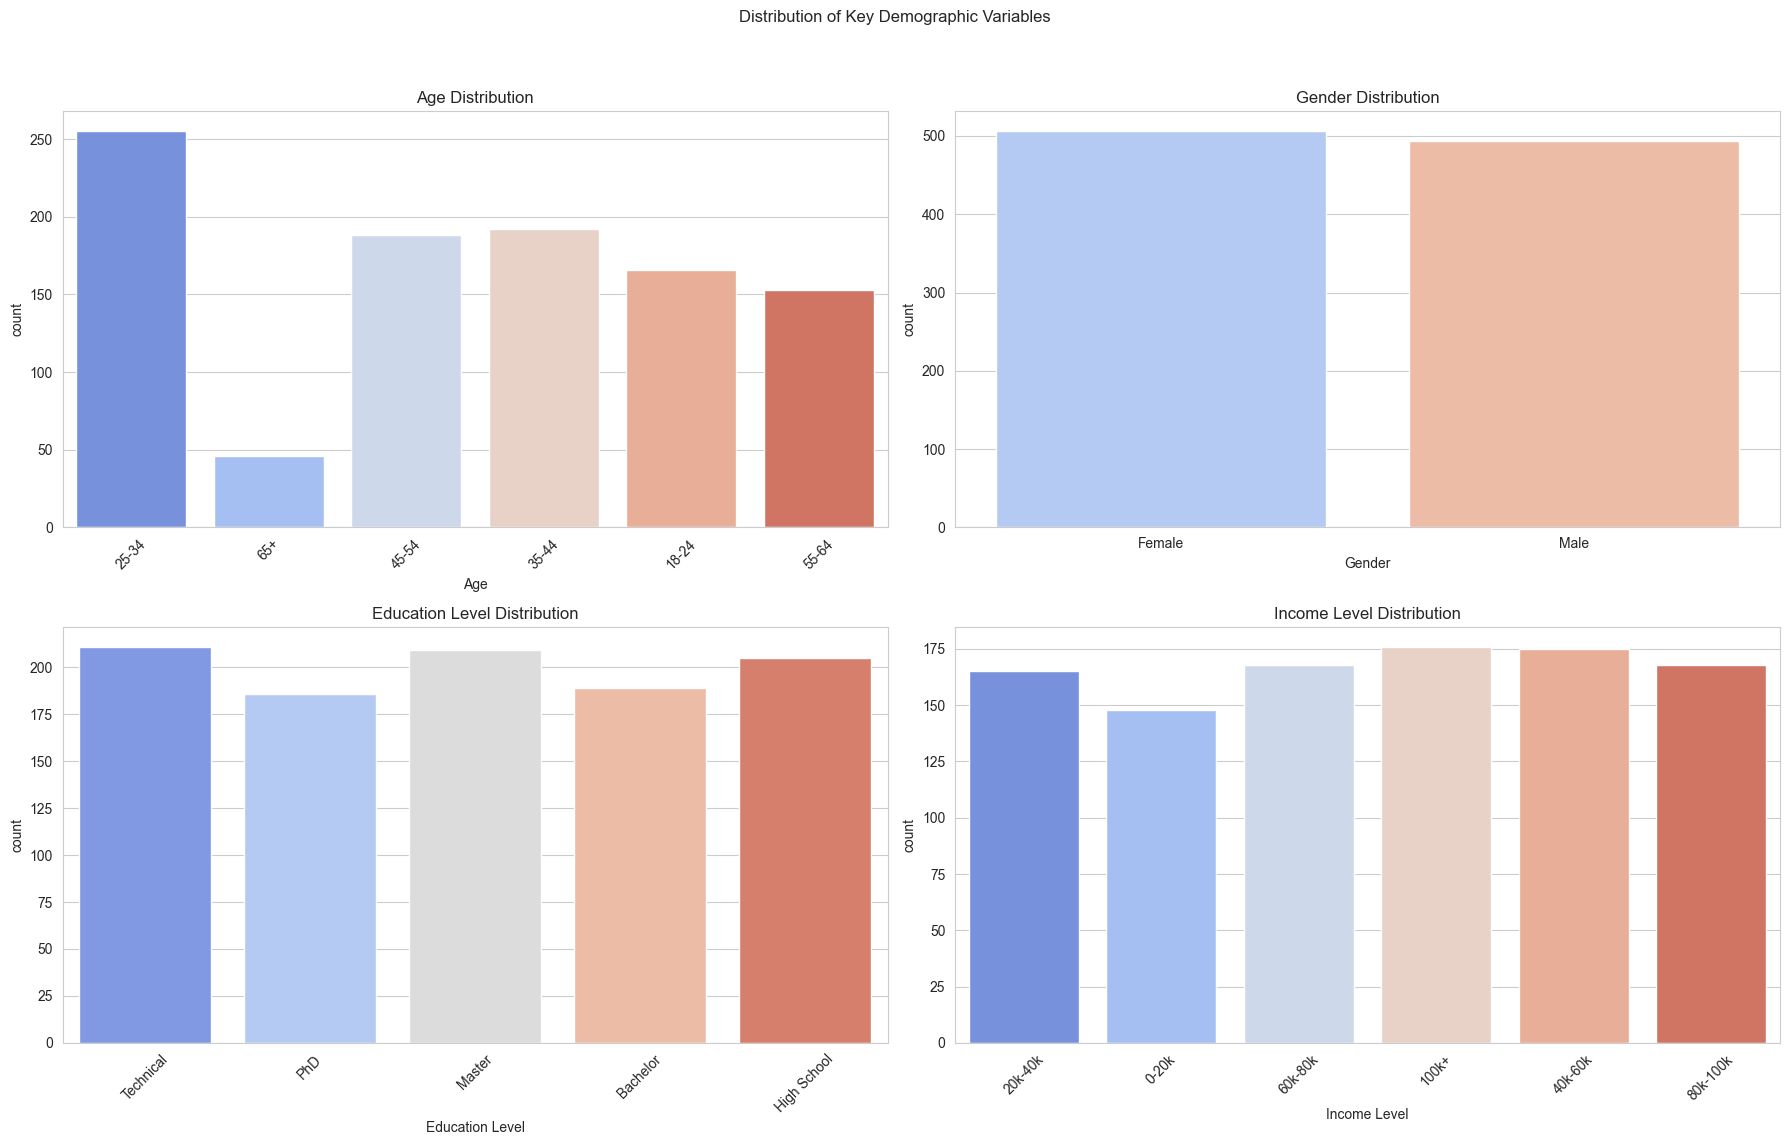

In [3]:
# Settings the aesthetic style of the plots
sns.set_style("whitegrid")

# creating subplots for the demographic distributions
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Distribution of Key Demographic Variables')

# age distribution
sns.countplot(ax=axes[0,0], x='Age', hue='Age', data=data, palette='coolwarm')
axes[0,0].set_title('Age Distribution')
axes[0,0].tick_params(axis='x', rotation=45)

# Gender distribution
sns.countplot(ax=axes[0,1], x='Gender', hue='Gender', data=data, palette='coolwarm')
axes[0,1].set_title('Gender Distribution')

# eduction level distribution
sns.countplot(ax=axes[1,0], x='Education Level', hue='Education Level', data=data, palette='coolwarm')
axes[1,0].set_title('Education Level Distribution')
axes[1,0].tick_params(axis='x', rotation=45)

# Income level distribution
sns.countplot(ax=axes[1,1], x='Income Level', hue='Income Level', data=data, palette='coolwarm')
axes[1,1].set_title('Income Level Distribution')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

We’ll now examine device usage patterns to understand the primary means by which users access the platform. This information is crucial for optimizing ad formats and delivery channels. Additionally, we’ll explore users’ online behaviour, including their engagement with content and ads, and identify the most common interests among users. Let’s proceed with analyzing device usage patterns:

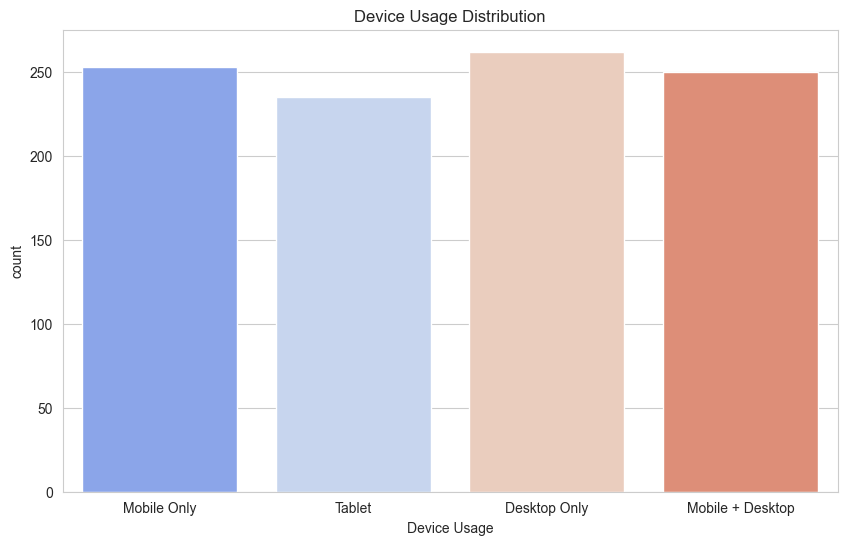

In [4]:
# device usage distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Device Usage', data=data, palette='coolwarm', hue='Device Usage', legend=False)
plt.title('Device Usage Distribution')
plt.show()

We’ll now:

- Analyze the average time users spend online on weekdays versus weekends.
- Investigate user engagement metrics, such as likes and reactions.
- Delve into ad interaction metrics, including Click-Through Rates (CTR), Conversion Rates, and Ad Interaction Time.

It will help us understand the users’ activity patterns and their interaction with ads, which is crucial for effective ad targeting and optimization:

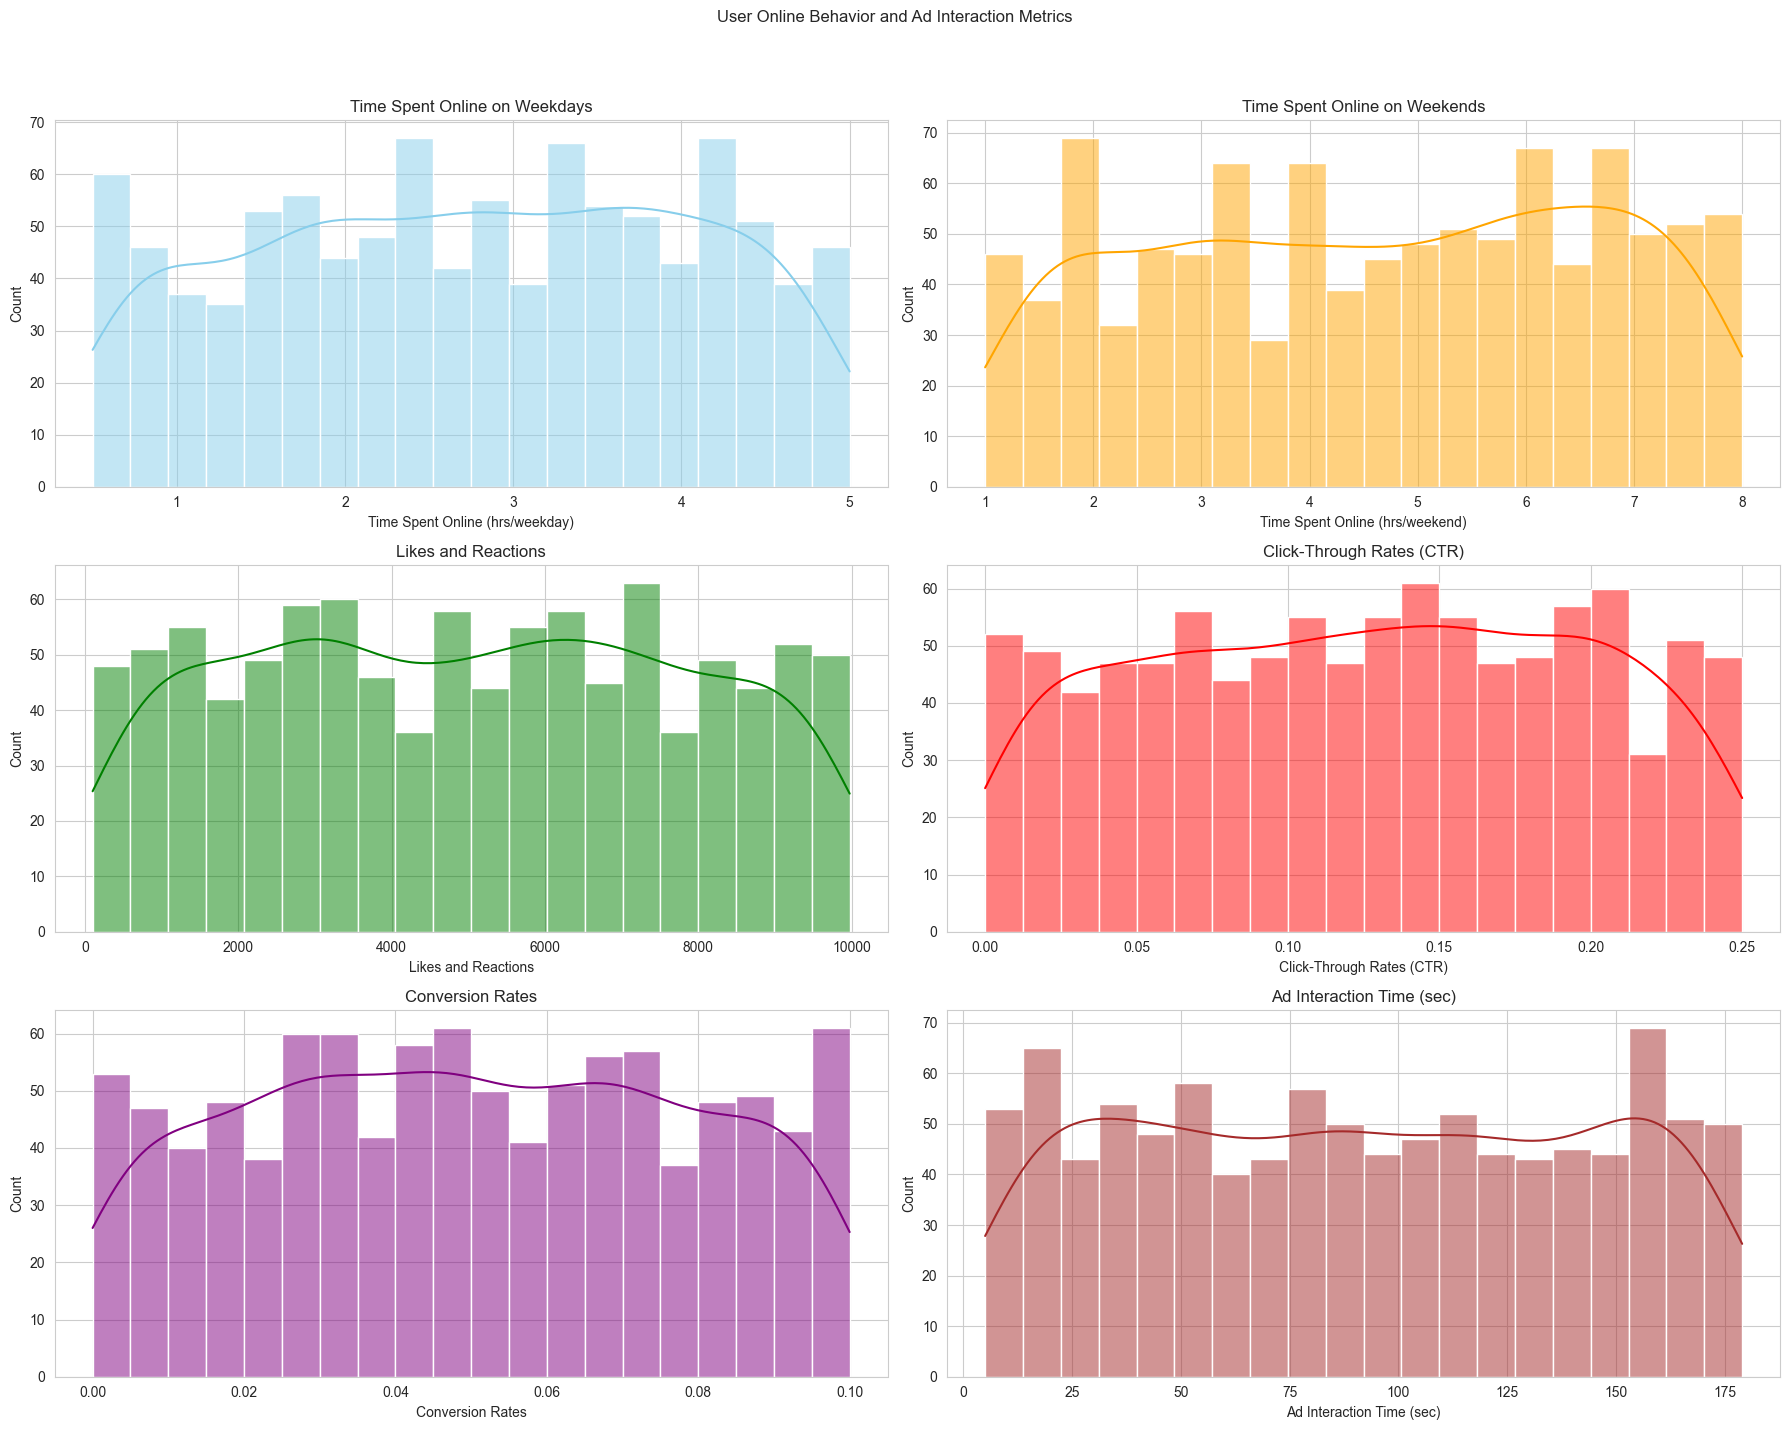

In [5]:
# Creating subplots for user online behavior and ad interaction metrics
fig, axes = plt.subplots(3, 2, figsize=(18,15))
fig.suptitle('User Online Behavior and Ad Interaction Metrics')

# Time spent online on weekdays
sns.histplot(ax=axes[0,0], x='Time Spent Online (hrs/weekday)', data=data, bins=20, kde=True, color='skyblue')
axes[0,0].set_title('Time Spent Online on Weekdays')

# Time spent online on weekends
sns.histplot(ax=axes[0,1], x='Time Spent Online (hrs/weekend)', data=data, bins=20, kde=True, color='orange')
axes[0,1].set_title('Time Spent Online on Weekends')

# Likes and reactions
sns.histplot(ax=axes[1,0], x='Likes and Reactions', data=data, bins=20, kde=True, color='green')
axes[1,0].set_title('Likes and Reactions')

# Click-through rates
sns.histplot(ax=axes[1,1], x='Click-Through Rates (CTR)', data=data, bins=20, kde=True, color='red')
axes[1,1].set_title('Click-Through Rates (CTR)')

# Conversion Rates
sns.histplot(ax=axes[2,0], x='Conversion Rates', data=data, bins=20, kde=True, color='purple')
axes[2,0].set_title('Conversion Rates')

# ad interaction time
sns.histplot(ax=axes[2,1], x='Ad Interaction Time (sec)', data=data, bins=20, kde=True, color='brown')
axes[2,1].set_title('Ad Interaction Time (sec)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Now, let's identify the most common interests among users, which is vital for segmentings the audience and tailoring ad campaigns to match user preferences:

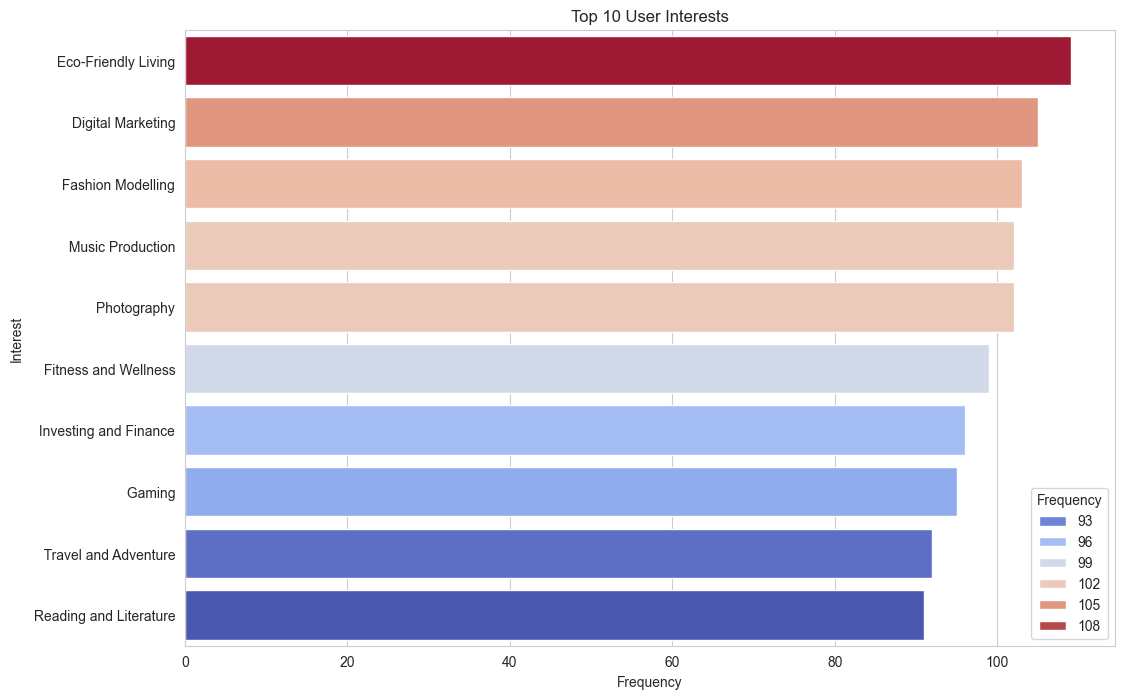

In [6]:
from collections import Counter

#splitting the 'Top Interests' column and creating a list of all interests
interests_list = data['Top Interests'].str.split(',').sum()

# counting the frequency of each interest
interests_counter = Counter(interests_list)

# converting the counter object to a DataFrame for easier plotting
interests_df = pd.DataFrame(interests_counter.items(), columns=['Interest', 'Frequency']).sort_values(by='Frequency', ascending=False)

# plotting the most common interests
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y ='Interest', data = interests_df.head(10),hue='Frequency', palette='coolwarm')
plt.title('Top 10 User Interests')
plt.xlabel('Frequency')
plt.ylabel('Interest')
plt.show()

#### User Profiling and Segmentation

We can now segment users into distinct groups for targeted ad campaigns. Segmentation can be based on various criteria, such as:

- **Demographics**: Age, Gender, Income Level, Education Level
- **Behavioural**: Time Spent Online, Likes and Reactions, CTR, Conversion Rates
- **Interests**: Aligning ad content with the top interests identified

To implement user profiling and segmentation, we can apply clustering techniques or develop personas based on the combination of these attributes. This approach enables the creation of more personalized and effective ad campaigns, ultimately enhancing user engagement and conversion rates.

Let's start by selecting a subset of features that could be most indicative of user preferences and behaviour for segmentation and apply a clustering algorithm to create user segments:

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# Selecting features for clustering
features = ['Age', 'Gender', 'Income Level', 'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']

# seperating the features we want to consider for clustering
X = data[features]

# Defining preprocessing for numerical and categorical features
numeric_features = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
numeric_transformer = StandardScaler()

categorical_features = ['Age', 'Gender', 'Income Level']
categorical_transformer = OneHotEncoder()

# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# creating a preprocessing and clustering pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          ('cluster', KMeans(n_clusters=5, random_state=42))])

pipeline.fit(X)
cluster_labels = pipeline.named_steps['cluster'].labels_
data['Cluster'] = cluster_labels

print(data.head())

   User ID    Age  Gender  Location Language Education Level  \
0        1  25-34  Female  Suburban    Hindi       Technical   
1        2    65+    Male     Urban    Hindi             PhD   
2        3  45-54  Female  Suburban  Spanish       Technical   
3        4  35-44  Female     Rural  Spanish             PhD   
4        5  25-34  Female     Urban  English       Technical   

   Likes and Reactions  Followed Accounts  Device Usage  \
0                 5640                190   Mobile Only   
1                 9501                375        Tablet   
2                 4775                187   Mobile Only   
3                 9182                152  Desktop Only   
4                 6848                371   Mobile Only   

   Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
0                              4.5                              1.7   
1                              0.5                              7.7   
2                              4.5             

The clustering process has successfully segmented our users into five distinct groups (Clusters 0 to 4). Each cluster represents a unique combination of the features we selected, including age, gender, income level, online behaviour, and engagement metrics. These clusters can serve as the basis for creating targeted ad campaigns tailored to the preferences and behaviours of each segment.

We'll compute the mean values of the numerical features and the mode for categorical features within each cluster to get a sense of their defining characteristics:

In [8]:
# computing the mean values of numerical features for each cluster
cluster_means = data.groupby('Cluster')[numeric_features].mean()

for feature in categorical_features:
    mode_series = data.groupby('Cluster')[feature].agg(lambda x: x.mode()[0])
    cluster_means[feature] = mode_series

print(cluster_means)

         Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
Cluster                                                                     
0                               3.911111                         5.212963   
1                               1.559394                         6.002424   
2                               3.019737                         2.584211   
3                               3.080882                         5.774510   
4                               1.809626                         3.839572   

         Likes and Reactions  Click-Through Rates (CTR)    Age  Gender  \
Cluster                                                                  
0                2409.620370                   0.149588  25-34  Female   
1                5005.121212                   0.179836  35-44    Male   
2                6861.587719                   0.170614  25-34    Male   
3                7457.602941                   0.067971  25-34  Female   
4               

Now, we'll assign each cluster a name that reflects its most defining characteristics based on the mean values of numerical features and the most frequent categories for categorical features. Based on the cluster analysis, we can summarize and name the segments as follows:

1. **Cluster 0 - "Weekend Warriors"**: High weekend online activity, moderate likes and reactions, predominantly male, age group 25-34, income level 80k-100k.
2. **Cluster 1 - "Engaged Professionals"**: Balanced online activity, high likes and reactions, predominantly male, age group 25-34, high income (100k+)
3. **Cluster 2 - "Low-Key Users"**: Moderate to high weekend online activity, moderate likes and reactions, predominantly male, age group 25-34, income level 60k-80k, lower CTR.
4. **Cluster 3 - "Active Explorers"**: High overall online activity, lower likes and reactions, predominantly female, age group 25-34, income level 60k-80k.
5. **Cluster 4 - "Budget Browsers"**: Moderate online activity, lowest likes and reactions, predominantly female, age group 25-34, lowest income level (0-20k), lower CTR.

In [9]:
import numpy as np

# preparing data for radar chart
features_to_plot = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
labels = np.array(features_to_plot)

# creating a dataframe for the radar chart
radar_df = cluster_means[features_to_plot].reset_index()

# normalizing the data
radar_df_normalized = radar_df.copy()
for feature in features_to_plot:
    radar_df_normalized[feature] = (radar_df[feature] - radar_df[feature].min()) / (radar_df[feature].max() - radar_df[feature].min())

# adding a full circle for plotting
radar_df_normalized = pd.concat([radar_df_normalized, radar_df_normalized.iloc[[0]]], ignore_index=True)

# assigning names to segments
segment_names = ['Weekend Warriors', 'Engaged Professionals', 'Low-Key Users', 'Active Explorers', 'Budget Browsers']

Now, let's create a visulization that reflects these segments, using teh cluster means for numerical features and highlighting the distinctive characteristics of each segment. We'll create a radar chart that compares the mean values of selected features across the clusters, providing a visual representation of each segment's profile:

In [11]:
import plotly.graph_objects as go
fig = go.Figure()

# Loop through each segment to add to the radar chart
for i, segment in enumerate(segment_names):
    fig.add_trace(go.Scatterpolar(
        r=radar_df_normalized.iloc[i][features_to_plot].values.tolist() + [radar_df_normalized.iloc[i][features_to_plot].values[0]], # Add the first value at the end to close the radar chart
        theta=labels.tolist() + [labels[0]], # Add the first label at the end to close the radar chart
        fill='toself',
        name=segment,
        hoverinfo='text',
        text=[f"{label}: {value:.2f}" for label, value in zip(features_to_plot, radar_df_normalized.iloc[i][features_to_plot])] + [f"{labels[0]}: {radar_df_normalized.iloc[i][features_to_plot][0]:.2f}"] # Adding hover text for each feature
    ))

# Update the layout to finalize the radar chart
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0,1]
        )
    ),
    showlegend=True,
    title='User Segments Profile',
    height=800,
    width=1000
)

fig.show()

C:\Users\Zahra\AppData\Local\Temp\ipykernel_11308\1460498402.py:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Zahra\AppData\Local\Temp\ipykernel_11308\1460498402.py:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Zahra\AppData\Local\Temp\ipykernel_11308\1460498402.py:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Zahra\AppData\Local\Temp\ipykernel_11308\1460498402.py:12: FutureWarning:

Series.__g

The chart above is useful for marketers to understand the behaviour of different user segments and tailor their advertising strategies accordingly. For example, ads targeting the "Weekend Warriors" could be scheduled for the weekend when they are most active, while "Engaged Professionals" might respond better to ads that are spread evenly throughout the week.

## Summary

User profiling refers to creating detailed profiles that represent the behaviours and preferences of users, and segmentation divides the user base into distinct groups with common characteristics, making it easier to target specific segments with personalized marketing, products, or services.